# The ARMI Nuclide and Element Packages

One of the key features that the ARMI framework offers is access to nuclide data across an application (recall: a *nuclide* is a particular isotope of an element. Iron-56, Uranium-238, and Boron-10 are all nuclides). This is specifically useful for nuclear engineers so that manual look-ups of nuclide attributes on sources like Wikipedia, Chart of the Nuclides, etc. are not needed. 

The available attributes for each nuclide are:

- Atomic weight/mass, in amu
- Natural abundance
- Atomic number, Z
- Mass number, A
- Half-life
- Neutron yield from spontaneous fission
    
Accessing the nuclide data begins with importing the nuclide bases, and optionally, the elements packages:

In [7]:
from armi.nucDirectory.elements import Elements
from armi.nucDirectory.nuclideBases import NuclideBases

elements = Elements()
nuclideBases = NuclideBases()

One these packages are imported, there are several module-level global dictionaries that are important to know about, since these are likely what you will be working with when implementing code that requires nuclide data or just when performing data look-ups:

**Nuclide Bases Global Dictionaries**

- nuclideBases.byName
- nuclideBases.DBName
- nuclideBases.byLabel
- nuclideBases.byMcc2Id
- nuclideBases.byMcc3Id
- nuclideBases.byMcnpId
- nuclideBases.byAAAZZZSId
   
**Elements Global Dictionaries**

- elements.byZ
- elements.bySymbol
- elements.byName

## Accessing Individual Nuclide Data/Attributes

Here we will explore retrieving data from a couple nuclides and showing the coupling between nuclide and element definitions. For these examples, let's try to answer the following questions:

- How many total nuclides and elements are defined in the framework?
- What is atomic weight of a selected nuclide?
- What is the natural abundance a selected nuclide?
- Are there any spontaneous fission neutrons for a selected nuclide?
- What is the half-life in seconds for a selected nuclide?
- How many other nuclides for the same element exist for a selected nuclide?
    

### How many total nuclides and elements are defined in the framework?

In [8]:
import collections

print(f"Number of elements defined in the framework: {len(elements.byZ.values())}")
print("")
print(f"Number of nuclides defined in the framework: {len(nuclideBases.instances)}")
nucsByType = collections.defaultdict(list)
for n in nuclideBases.instances:
    nucsByType[type(n)].append(n)

for typ, nucs in nucsByType.items():
    print(f"   - Number of nuclides of type `{typ}`: {len(nucs)}")

Number of elements defined in the framework: 120

Number of nuclides defined in the framework: 4706
   - Number of nuclides of type `<class 'armi.nucDirectory.nuclideBases.NuclideBase'>`: 4614
   - Number of nuclides of type `<class 'armi.nucDirectory.nuclideBases.NaturalNuclideBase'>`: 84
   - Number of nuclides of type `<class 'armi.nucDirectory.nuclideBases.DummyNuclideBase'>`: 2
   - Number of nuclides of type `<class 'armi.nucDirectory.nuclideBases.LumpNuclideBase'>`: 6


### Looking up nuclide and elemental data for U-235

In [9]:
u235 = nuclideBases.byName["U235"]

print(u235)
print(f"Atomic Weight (amu): {u235.weight}")
print(f"Natural Abundance: {u235.abundance}")
print(f"Spontaneous Fission Neutron Yield: {u235.nuSF}")
print(f"Half-life (seconds): {u235.halflife}")
print("")
print(f"Other nuclides for {elements.byZ[u235.z].name}:")
for n in elements.byZ[u235.z].nuclides:
    print(f"    - {n}")

<NuclideBase U235:  Z:92, A:235, S:0, W:2.350439e+02, Label:U235>, HL:2.22160758861e+16, Abund:7.204000e-03>
Atomic Weight (amu): 235.043929425
Natural Abundance: 0.007204
Spontaneous Fission Neutron Yield: 1.87
Half-life (seconds): 2.22160758861e+16

Other nuclides for Uranium:
    - <NaturalNuclideBase U:  Z:92, W:2.380289e+02, Label:U>
    - <NuclideBase U215:  Z:92, A:215, S:0, W:2.150262e+02, Label:U215>, HL:7.00000000000e-04, Abund:0.000000e+00>
    - <NuclideBase U216:  Z:92, A:216, S:0, W:2.160240e+02, Label:U216>, HL:4.50000000000e-03, Abund:0.000000e+00>
    - <NuclideBase U217:  Z:92, A:217, S:0, W:2.170244e+02, Label:U217>, HL:1.60000000000e-02, Abund:0.000000e+00>
    - <NuclideBase U218:  Z:92, A:218, S:0, W:2.180235e+02, Label:U218>, HL:6.50000000000e-04, Abund:0.000000e+00>
    - <NuclideBase U219:  Z:92, A:219, S:0, W:2.190249e+02, Label:U219>, HL:6.00000000000e-05, Abund:0.000000e+00>
    - <NuclideBase U220:  Z:92, A:220, S:0, W:2.200247e+02, Label:U220>, HL:1.111100

### Looking up nuclide and elemental data for Li-7

In [10]:
li7 = nuclideBases.byName["LI7"]

print(li7)
print(f"Atomic Weight (amu): {li7.weight}")
print(f"Natural Abundance: {li7.abundance}")
print(f"Spontaneous Fission Neutron Yield: {li7.nuSF}")
print(f"Half-life (seconds): {li7.halflife}")
print("")
print(f"Other nuclides for {elements.byZ[li7.z].name}:")
for n in elements.byZ[li7.z].nuclides:
    print(f"    - {n}")

<NuclideBase LI7:  Z:3, A:7, S:0, W:7.016004e+00, Label:LI07>, HL:inf            , Abund:9.241000e-01>
Atomic Weight (amu): 7.01600439548
Natural Abundance: 0.92410004
Spontaneous Fission Neutron Yield: 0.0
Half-life (seconds): inf

Other nuclides for Lithium:
    - <NaturalNuclideBase LI:  Z:3, W:6.940038e+00, Label:LI>
    - <NuclideBase LI3:  Z:3, A:3, S:0, W:3.030775e+00, Label:LI03>, HL:1.11110000000e+01, Abund:0.000000e+00>
    - <NuclideBase LI4:  Z:3, A:4, S:0, W:4.027185e+00, Label:LI04>, HL:inf            , Abund:0.000000e+00>
    - <NuclideBase LI5:  Z:3, A:5, S:0, W:5.012538e+00, Label:LI05>, HL:3.70924971603e-22, Abund:0.000000e+00>
    - <NuclideBase LI6:  Z:3, A:6, S:0, W:6.015123e+00, Label:LI06>, HL:inf            , Abund:7.590000e-02>
    - <NuclideBase LI7:  Z:3, A:7, S:0, W:7.016004e+00, Label:LI07>, HL:inf            , Abund:9.241000e-01>
    - <NuclideBase LI8:  Z:3, A:8, S:0, W:8.022488e+00, Label:LI08>, HL:8.39900000000e-01, Abund:0.000000e+00>
    - <NuclideBas

### Exploring elemental Lithium data

In [11]:
liElement = elements.bySymbol["LI"]

print(liElement)
print("")
print(f"Average Atomic weight: {liElement.standardWeight}")
print(f"Is Naturally Occurring?: {liElement.isNaturallyOccurring()}")
print(f"Is a Heavy Metal Atom?: {liElement.isHeavyMetal()}")

<Element  LI (Z=3), Lithium, ChemicalGroup.ALKALI_METAL, ChemicalPhase.SOLID>

Average Atomic weight: 6.940037501798687
Is Naturally Occurring?: True
Is a Heavy Metal Atom?: False


## Plotting the Chart of the Nuclides

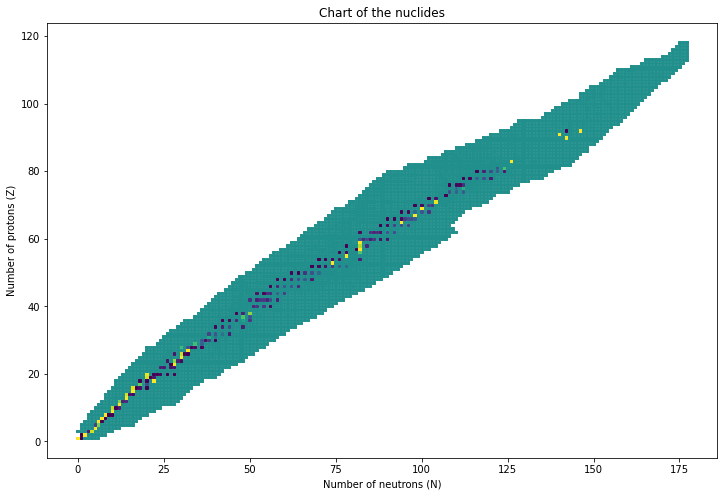

In [12]:
import matplotlib.pyplot as plt

xyc = []
for name, base in nuclideBases.byName.items():
    if not base.a:
        continue
    xyc.append((base.a - base.z, base.z, base.abundance or 0.5))
x, y, c = zip(*xyc)
plt.figure(figsize=(12, 8))
plt.scatter(x, y, c=c, marker="s", s=6)
plt.title("Chart of the nuclides")
plt.xlabel("Number of neutrons (N)")
plt.ylabel("Number of protons (Z)")
plt.show()